### Toronto Airbnb: Exploratory data analysis and classification using SVC and random forest

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

pd.set_option("display.max_columns", 100)
pd.set_option('display.max_colwidth', 100)
pd.set_option("display.notebook_repr_html", True)

#### load dataset


In [2]:
df = pd.read_csv("listings.csv")

#### look at the dataset -- head, shape, info, check for missing values, and basic statistics

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64617,-79.42451,Entire home/apt,469,4,7,2017-12-04,0.14,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64105,-79.37628,Private room,99,180,169,2013-08-27,1.38,2,0
2,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.66724,-79.41598,Private room,66,1,0,NaN,NaN,1,0
3,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69602,-79.45468,Private room,72,1,211,2019-09-02,1.87,2,262
4,26654,"World Class downtown@ CN Tower! Jays, TIFF, ACC",113345,Adela,NaN,Waterfront Communities-The Island,43.64530,-79.38940,Entire home/apt,199,4,38,2019-08-17,0.36,7,323


In [4]:
print("Column names: \n", df.columns)
print("\nNumber of rows are: {} and number of columns are: {}".format(df.shape[0], df.shape[1]))
print("\nFindout missing values: \n")
print(df.info())

Column names: 
 Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Number of rows are: 21900 and number of columns are: 16

Findout missing values: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21900 entries, 0 to 21899
Data columns (total 16 columns):
id                                21900 non-null int64
name                              21898 non-null object
host_id                           21900 non-null int64
host_name                         21894 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     21900 non-null object
latitude                          21900 non-null float64
longitude                         21900 non-null float64
room_type                         

#### drop irrelevant columns: "column neighbourhood_group", "id", "name", "host_id", 'calculated_host_listing_count"

In [5]:
df_cleaned = df.copy()

In [6]:
df_cleaned.drop(columns=["id", "name", "host_id", "host_name", "neighbourhood_group","last_review", "calculated_host_listings_count"]\
               ,inplace=True)

In [7]:
df_cleaned.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,Little Portugal,43.64617,-79.42451,Entire home/apt,469,4,7,0.14,0
1,Waterfront Communities-The Island,43.64105,-79.37628,Private room,99,180,169,1.38,0
2,Annex,43.66724,-79.41598,Private room,66,1,0,NaN,0
3,Briar Hill-Belgravia,43.69602,-79.45468,Private room,72,1,211,1.87,262
4,Waterfront Communities-The Island,43.64530,-79.38940,Entire home/apt,199,4,38,0.36,323


In [8]:
df_cleaned.isnull().sum()

neighbourhood           0
latitude                0
longitude               0
room_type               0
price                   0
minimum_nights          0
number_of_reviews       0
reviews_per_month    3667
availability_365        0
dtype: int64

In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21900 entries, 0 to 21899
Data columns (total 9 columns):
neighbourhood        21900 non-null object
latitude             21900 non-null float64
longitude            21900 non-null float64
room_type            21900 non-null object
price                21900 non-null int64
minimum_nights       21900 non-null int64
number_of_reviews    21900 non-null int64
reviews_per_month    18233 non-null float64
availability_365     21900 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.5+ MB


In [10]:
df_cleaned[df_cleaned.reviews_per_month.isnull()].head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
2,Annex,43.66724,-79.41598,Private room,66,1,0,NaN,0
46,Woburn,43.78076,-79.24788,Entire home/apt,79,2,0,NaN,0
61,Dovercourt-Wallace Emerson-Junction,43.66823,-79.43594,Entire home/apt,101,2,0,NaN,0
70,Broadview North,43.68790,-79.35268,Private room,75,1,0,NaN,364
71,Yonge-St.Clair,43.68436,-79.40053,Entire home/apt,199,7,0,NaN,0


In [11]:
df_cleaned.drop(columns='reviews_per_month', inplace=True)

In [12]:
df_cleaned.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Little Portugal,43.64617,-79.42451,Entire home/apt,469,4,7,0
1,Waterfront Communities-The Island,43.64105,-79.37628,Private room,99,180,169,0
2,Annex,43.66724,-79.41598,Private room,66,1,0,0
3,Briar Hill-Belgravia,43.69602,-79.45468,Private room,72,1,211,262
4,Waterfront Communities-The Island,43.64530,-79.38940,Entire home/apt,199,4,38,323


#### basic statistics

In [13]:
df_cleaned.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365
count,21900.000000,21900.000000,21900.000000,21900.000000,21900.000000,21900.000000
mean,43.679677,-79.397414,146.158813,6.419178,27.883516,126.594292
std,0.048003,0.062288,245.156838,28.537106,49.723882,128.470748
min,43.586710,-79.623460,0.000000,1.000000,0.000000,0.000000
25%,43.644870,-79.424810,66.000000,1.000000,1.000000,0.000000
50%,43.661920,-79.397240,101.000000,2.000000,9.000000,82.000000
75%,43.696200,-79.377267,170.000000,3.000000,31.000000,242.000000
max,43.838040,-79.127810,13244.000000,1125.000000,749.000000,365.000000


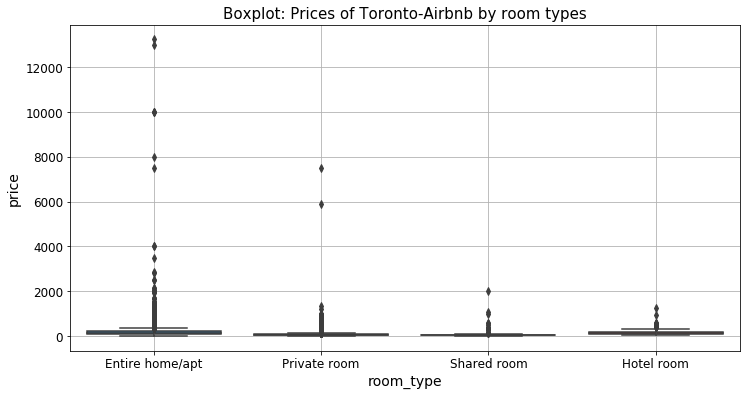

In [14]:
plt.figure('boxplot', figsize=(12,6))
sns.boxplot(y='price', x='room_type', data=df_cleaned)
plt.title('Boxplot: Prices of Toronto-Airbnb by room types' , fontsize = 15)
plt.grid(True)
plt.show()

#### From the above boxplot, we observe outliers (extreme prices close to CAD 13,000). So prices above CAD 300 are dropped from the analysis.

#### Drop price outliers

In [15]:
df_cleaned_v1 = df_cleaned[df_cleaned.price <= 300]

#### Draw violinplot after dropping outliers. We see combination of boxplot and kernel distribuion of prices based on room type 

C:\Users\elias\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


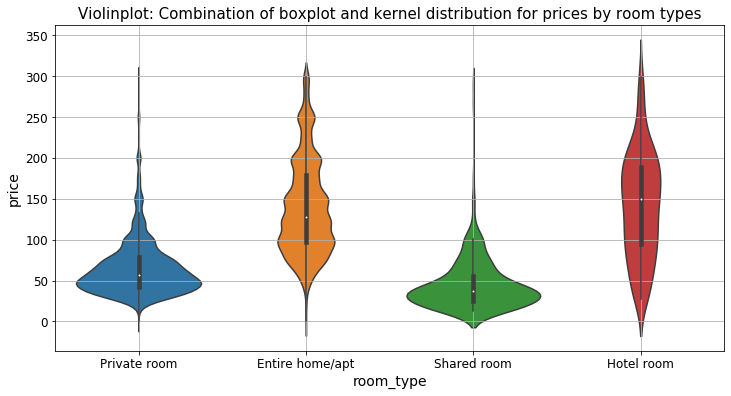

In [16]:
plt.figure('violinplot', figsize=(12,6))
sns.violinplot(y='price', x='room_type', data=df_cleaned_v1)
plt.title("Violinplot: Combination of boxplot and kernel distribution for prices by room types", fontsize=15)
plt.grid(True)
plt.show()

In [17]:
df_cleaned_v1["price"].describe()

count    20289.000000
mean       112.798955
std         62.647562
min          0.000000
25%         65.000000
50%         99.000000
75%        150.000000
max        299.000000
Name: price, dtype: float64

In [18]:
df_cleaned_v1[df_cleaned_v1.room_type == "Hotel room"].price.describe()

count    173.000000
mean     140.936416
std       64.063300
min       28.000000
25%       95.000000
50%      150.000000
75%      189.000000
max      299.000000
Name: price, dtype: float64

In [19]:
# plt.figure('boxplot_neighbourhood', figsize=(12,6))
# ax = sns.boxplot(x='neighbourhood', y='price', data=df_cleaned_v1, hue='room_type')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# plt.grid(True)
# plt.title("Distribution of price by neighbourhood", fontsize=15)
# plt.show()

In [20]:
# plt.figure('boxplot_neighbourhood', figsize=(12,6))
# ax = sns.boxplot(x='neighbourhood', y='price', data=df_cleaned_v1[50:100], hue='room_type')
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
# plt.grid(True)
# plt.title("Distribution of price by neighbourhood", fontsize=15)
# plt.show()

In [21]:
# plt.figure('boxplot_neighbourhood', figsize=(12,6))
# ax = sns.boxplot(x='neighbourhood', y='price', data=df_cleaned_v1[100:150], hue='room_type')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# plt.grid(True)
# plt.title("Distribution of price by neighbourhood", fontsize=15)
# plt.show()

#### pivot by index=neighbourhood, columns = 'room_type' and values='price'

In [22]:
# df_cleaned_v1[df_cleaned_v1.room_type.isnull()==True]

In [23]:
df_ = df_cleaned_v1.pivot_table(index=['neighbourhood', 'room_type'])

In [24]:
df_.head()

availability_365   latitude  \
neighbourhood                room_type                                      
Agincourt North              Entire home/apt         58.285714  43.805991   
                             Private room           171.043478  43.808020   
                             Shared room             62.500000  43.810690   
Agincourt South-Malvern West Entire home/apt        163.576923  43.783526   
                             Private room           132.129032  43.789077   

                                              longitude  minimum_nights  \
neighbourhood                room_type                                    
Agincourt North              Entire home/apt -79.276639        1.714286   
                             Private room    -79.273143        1.826087   
                             Shared room     -79.276685        1.000000   
Agincourt South-Malvern West Entire home/apt -79.276072        2.115385   
                             Private room    -79.269452        1.661290   

                                              number_of_reviews       price  
neighbourhood                room_type                                       
Agincourt North              Entire home/apt          16.857143  178.714286  
                             Private room              9.695652   50.173913  
                             Shared room               0.000000   45.000000  
Agincourt South-Malvern West Entire home/apt          26.576923  124.538462  
                             Private room              9.483871   60.951613

In [25]:
df_neighbourhood_room_type = df_cleaned_v1.groupby(['neighbourhood', 'room_type'])['price'].describe()

In [26]:
df_neighbourhood_room_type.head()

count        mean        std  \
neighbourhood                room_type                                       
Agincourt North              Entire home/apt    7.0  178.714286  70.177666   
                             Private room      46.0   50.173913  25.899210   
                             Shared room        2.0   45.000000   7.071068   
Agincourt South-Malvern West Entire home/apt   26.0  124.538462  46.959754   
                             Private room      62.0   60.951613  26.746182   

                                               min     25%    50%    75%  \
neighbourhood                room_type                                     
Agincourt North              Entire home/apt  79.0  137.00  199.0  200.0   
                             Private room      0.0   36.50   49.0   52.0   
                             Shared room      40.0   42.50   45.0   47.5   
Agincourt South-Malvern West Entire home/apt  56.0   91.25  122.5  148.5   
                             Private room     19.0   45.75   56.0   69.5   

                                                max  
neighbourhood                room_type               
Agincourt North              Entire home/apt  299.0  
                             Private room     140.0  
                             Shared room       50.0  
Agincourt South-Malvern West Entire home/apt  250.0  
                             Private room     138.0

In [27]:
df_v3  = df_neighbourhood_room_type.reset_index(level=[0,1])

In [28]:
df_v3.head()

,neighbourhood,room_type,count,mean,std,min,25%,50%,75%,max
0,Agincourt North,Entire home/apt,7.0,178.714286,70.177666,79.0,137.00,199.0,200.0,299.0
1,Agincourt North,Private room,46.0,50.173913,25.899210,0.0,36.50,49.0,52.0,140.0
2,Agincourt North,Shared room,2.0,45.000000,7.071068,40.0,42.50,45.0,47.5,50.0
3,Agincourt South-Malvern West,Entire home/apt,26.0,124.538462,46.959754,56.0,91.25,122.5,148.5,250.0
4,Agincourt South-Malvern West,Private room,62.0,60.951613,26.746182,19.0,45.75,56.0,69.5,138.0


In [29]:
# df_v3[64:100]

In [30]:
# plt.figure('plot_neighbourhood_room_type', figsize=(13,6))
# ax1 = sns.barplot(y = 'count', x='neighbourhood', hue= 'room_type', data = df_v3[:103])
# ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
# plt.grid(True)
# plt.title("Room counts by neighbourhood and room types", fontsize=15)
# plt.legend(loc='best')
# plt.show()

In [31]:
# plt.figure('plot_neighbourhood_room_type', figsize=(13,6))
# ax1 = sns.barplot(y = 'count', x='neighbourhood', hue= 'room_type', data = df_v3[103:202])
# ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
# plt.grid(True)
# plt.title("Room counts by neighbourhood and room types", fontsize=15)
# plt.legend(loc='best')
# plt.show()

In [32]:
# plt.figure('plot_neighbourhood_room_type', figsize=(13,6))
# ax1 = sns.barplot(y = 'count', x='neighbourhood', hue= 'room_type', data = df_v3[203:])
# ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
# plt.grid(True)
# plt.title("Room counts by neighbourhood and room types", fontsize=15)
# plt.legend(loc='best')
# plt.show()

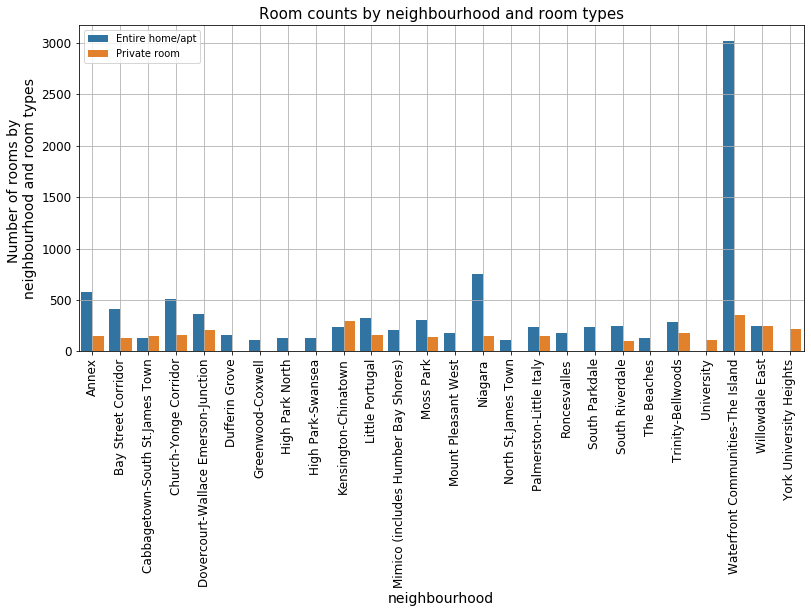

In [33]:
plt.figure('plot_neighbourhood_room_type', figsize=(13,6))
ax1 = sns.barplot(y = 'count', x='neighbourhood', hue='room_type', data=df_v3[df_v3['count']>100], )
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.grid(True)
plt.title("Room counts by neighbourhood and room types", fontsize=15)
plt.ylabel("Number of rooms by \nneighbourhood and room types")
plt.legend(loc='best')
plt.show()

In [34]:
# df_v2  = df_cleaned_v1.groupby(['neighbourhood', 'room_type'])['price'].agg(['min', 'mean', 'std', 'max'])

In [35]:
# df_v2.head()

In [36]:
df_v3.head()

,neighbourhood,room_type,count,mean,std,min,25%,50%,75%,max
0,Agincourt North,Entire home/apt,7.0,178.714286,70.177666,79.0,137.00,199.0,200.0,299.0
1,Agincourt North,Private room,46.0,50.173913,25.899210,0.0,36.50,49.0,52.0,140.0
2,Agincourt North,Shared room,2.0,45.000000,7.071068,40.0,42.50,45.0,47.5,50.0
3,Agincourt South-Malvern West,Entire home/apt,26.0,124.538462,46.959754,56.0,91.25,122.5,148.5,250.0
4,Agincourt South-Malvern West,Private room,62.0,60.951613,26.746182,19.0,45.75,56.0,69.5,138.0


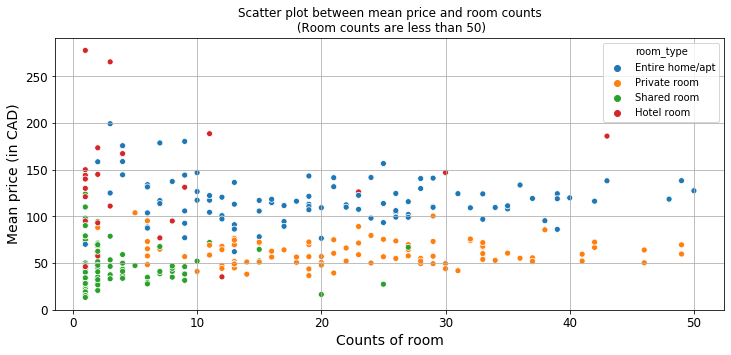

In [37]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='count', y='mean', data=df_v3[df_v3['count']<=50], hue='room_type')
plt.grid(True)
plt.xlabel('Counts of room')
plt.ylabel('Mean price (in CAD)')
plt.title('Scatter plot between mean price and room counts\n (Room counts are less than 50)')
plt.show()

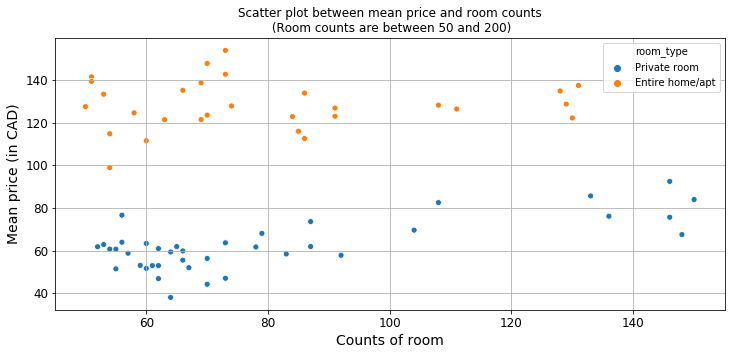

In [38]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='count', y='mean', data=df_v3[(df_v3['count']>=50) & (df_v3['count']<=150)], hue='room_type')
plt.grid(True)
plt.xlabel('Counts of room')
plt.ylabel('Mean price (in CAD)')
plt.title('Scatter plot between mean price and room counts\n (Room counts are between 50 and 200)')
plt.show()

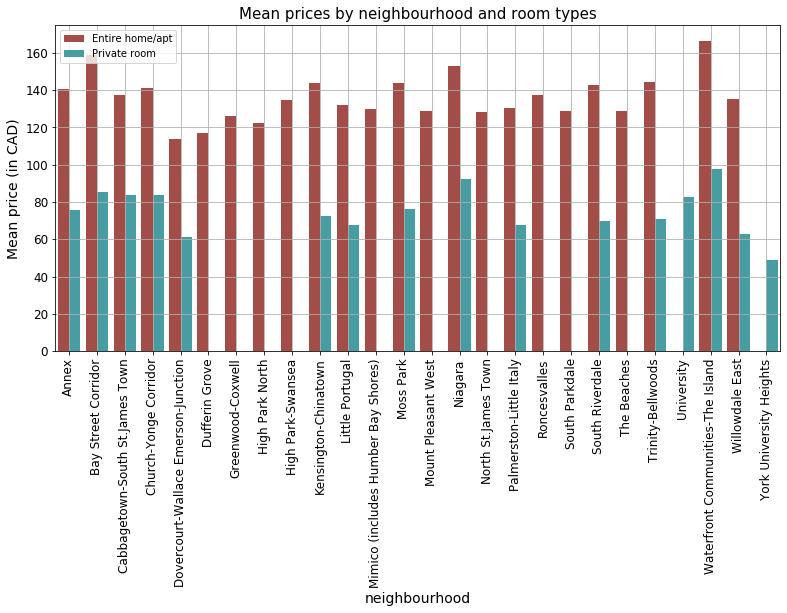

In [39]:
plt.figure('plot_neighbourhood_room_type', figsize=(13,6))
ax1 = sns.barplot(y = 'mean', x='neighbourhood', hue='room_type', data=df_v3[df_v3['count']>100],\
                  palette=sns.hls_palette(2, l=0.4), alpha=0.9)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

plt.grid(True)
plt.title("Mean prices by neighbourhood and room types", fontsize=15)
plt.ylabel("Mean price (in CAD)")
plt.legend(loc='best')
plt.show()

In [40]:
# plt.figure('boxplot_neighbourhood', figsize=(12,6))
# ax = sns.boxplot(x='neighbourhood', y='price', data = df_cleaned_v1[100:150], hue='room_type')
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
# plt.grid(True)
# plt.title("Distribution of price by neighbourhood", fontsize=15)
# plt.show()

In [41]:
df_v3.head(n=3)

,neighbourhood,room_type,count,mean,std,min,25%,50%,75%,max
0,Agincourt North,Entire home/apt,7.0,178.714286,70.177666,79.0,137.0,199.0,200.0,299.0
1,Agincourt North,Private room,46.0,50.173913,25.899210,0.0,36.5,49.0,52.0,140.0
2,Agincourt North,Shared room,2.0,45.000000,7.071068,40.0,42.5,45.0,47.5,50.0


In [42]:
df_cleaned_v1.head(n=3)

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
1,Waterfront Communities-The Island,43.64105,-79.37628,Private room,99,180,169,0
2,Annex,43.66724,-79.41598,Private room,66,1,0,0
3,Briar Hill-Belgravia,43.69602,-79.45468,Private room,72,1,211,262


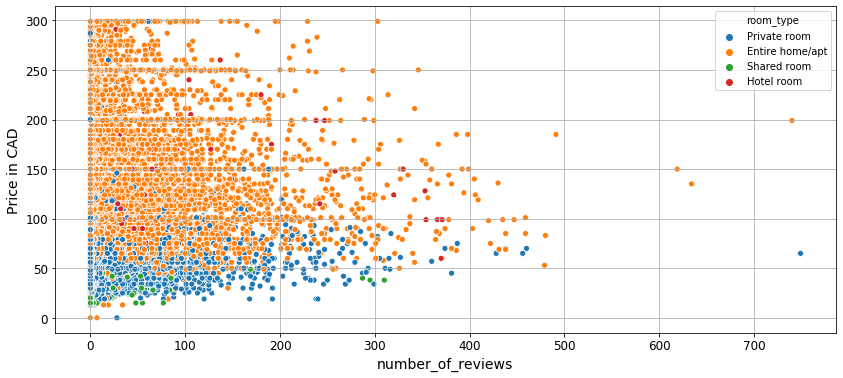

In [43]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='number_of_reviews', y='price', hue='room_type', data=df_cleaned_v1)
plt.grid(True)
plt.legend(loc='upper right')
plt.ylabel("Price in CAD")
plt.show()

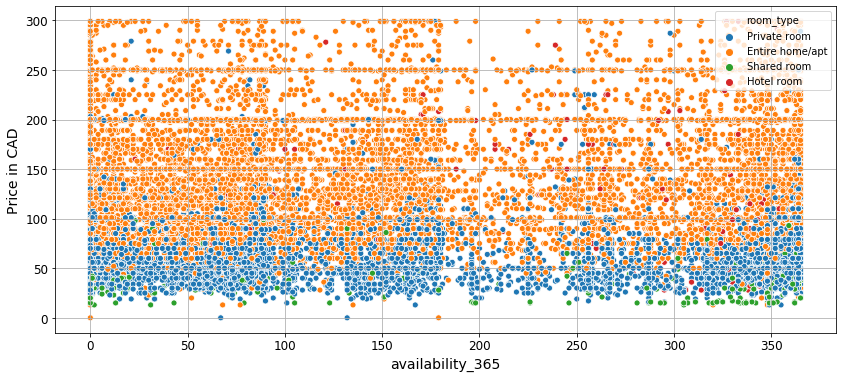

In [44]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='availability_365', y='price', hue='room_type', data=df_cleaned_v1)
plt.grid(True)
plt.legend(loc='upper right')
plt.ylabel("Price in CAD")
plt.show()

In [46]:
df_cleaned_v1.to_csv("cleaned_airbnb_dataset.csv", index=False )